In [1]:
from trust_2 import get_simrank
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
G = nx.Graph()

G.add_edge('x_send', 'x_1')
G.add_edge('x_send', 'x_2')
G.add_edge('x_send', 'x_3')
G.add_edge('x_send', 'x_4')

G.add_edge('x_recv', 'x_1')
G.add_edge('x_recv', 'x_2')
G.add_edge('x_recv', 'x_3')
G.add_edge('x_recv', 'x_4')

pos = {'x_send': [-1, 0],
       'x_recv': [1, 0],
       'x_1': [0, 1],
       'x_2': [0, 0.33],
       'x_3': [0, -0.33],
       'x_4': [0, -1],
      }

In [3]:
pos

{'x_send': [-1, 0],
 'x_recv': [1, 0],
 'x_1': [0, 1],
 'x_2': [0, 0.33],
 'x_3': [0, -0.33],
 'x_4': [0, -1]}

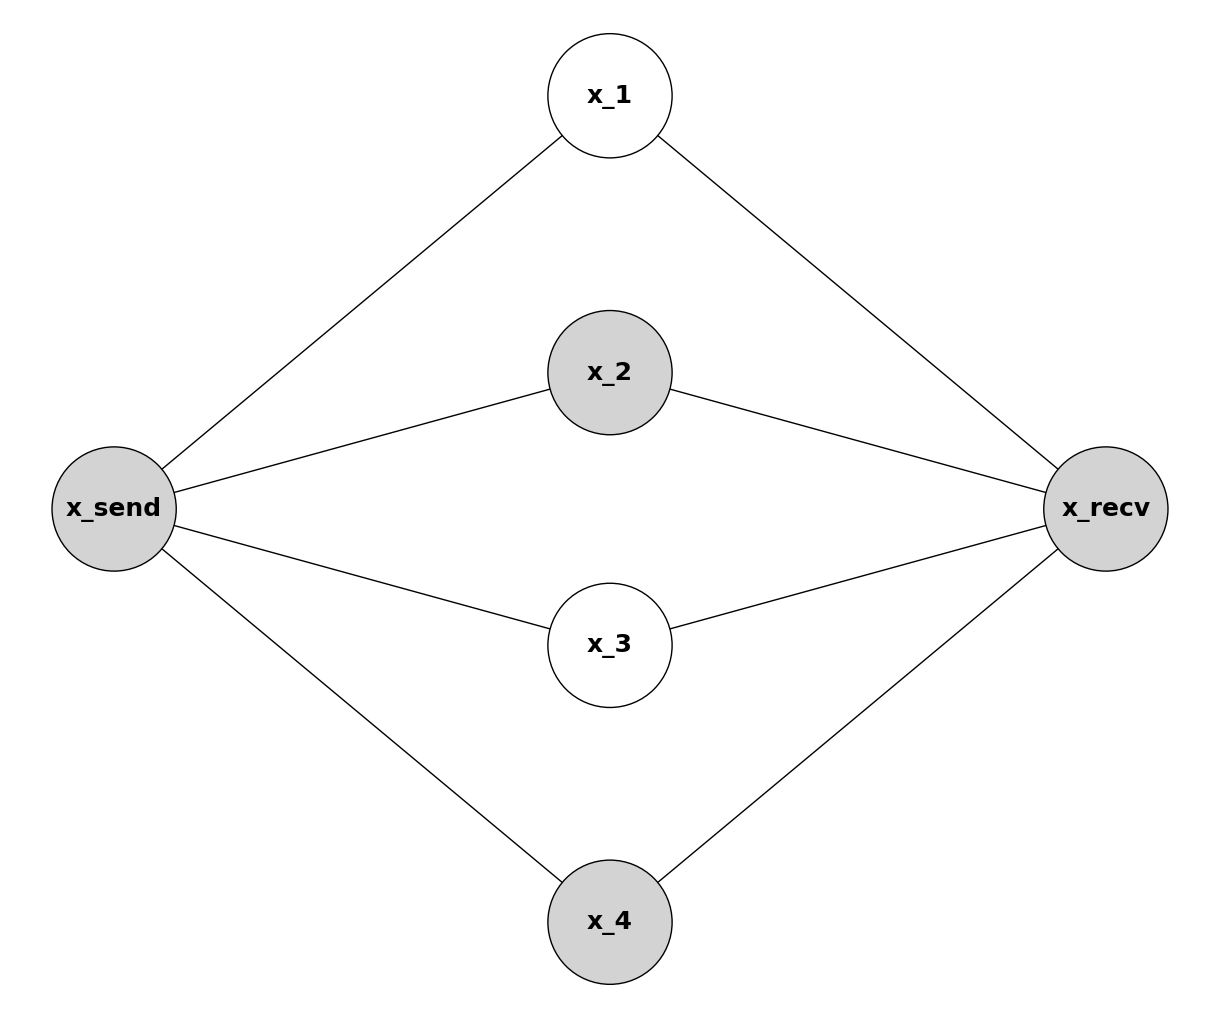

In [4]:
# subax1 = plt.subplot(121)

# pos = nx.spring_layout(G, seed=2)

# options = {
#     'width': 1,
#     'node_color': 'white',
# }


fig = plt.figure(1, figsize=(12, 10), dpi=100)

nx.draw(G,
        pos=pos,
        with_labels=True, 
        font_weight='bold',
        width=1,
        node_color=['lightgray', 'white', 'lightgray', 'white', 'lightgray', 'lightgray'],
        font_family="sans-serif",
        font_size=18,
        clip_on=False,
        # node_shape="8",
        node_size=8000,
)

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

In [5]:
G, s = get_simrank()

In [6]:
s

defaultdict(list,
            {'trusted': defaultdict(int,
                         {'trusted': 1,
                          'untrusted': 0.2751347479532173,
                          'semi-trusted': 0.25371670152592224,
                          '1': 0.400798257652645,
                          '2': 0.38623426017673235,
                          '3': 0.3551260469614706,
                          '4': 0.36945167820602925,
                          '5': 0.2867666976247857,
                          '6': 0.36660130304044963,
                          '7': 0.2792166730961572,
                          '8': 0.27936018570477256,
                          '9': 0.2792166730961572,
                          '10': 0.30706076529479365,
                          '11': 0.3019424229672764,
                          '12': 0.2849435910700559,
                          '13': 0.32037085967010837,
                          '14': 0.3782987856503371}),
             'untrusted': defaultdict(int,
          

In [7]:
to_draw = dict(s['trusted'].copy())

del to_draw['trusted']
del to_draw['untrusted']
del to_draw['semi-trusted']

to_draw

{'1': 0.400798257652645,
 '2': 0.38623426017673235,
 '3': 0.3551260469614706,
 '4': 0.36945167820602925,
 '5': 0.2867666976247857,
 '6': 0.36660130304044963,
 '7': 0.2792166730961572,
 '8': 0.27936018570477256,
 '9': 0.2792166730961572,
 '10': 0.30706076529479365,
 '11': 0.3019424229672764,
 '12': 0.2849435910700559,
 '13': 0.32037085967010837,
 '14': 0.3782987856503371}

In [8]:
thr_1 = 0.35
thr_2 = 0.3

tier_1 = [key for key, value in to_draw.items() if value >= thr_1]
tier_2 = [key for key, value in to_draw.items() if value < thr_1 and value >= thr_2]
tier_3 = [key for key, value in to_draw.items() if value < thr_2]

In [9]:
tier_3

['5', '7', '8', '9', '12']

In [10]:
G_to_draw = G.copy()

In [11]:
for node in ['trusted', 'untrusted', 'semi-trusted']:
    G_to_draw.remove_node(node)

In [12]:
colors = ['lightgreen' if i in tier_1 else 'yellow' if i in tier_2 else 'red' for i in  G_to_draw.nodes]

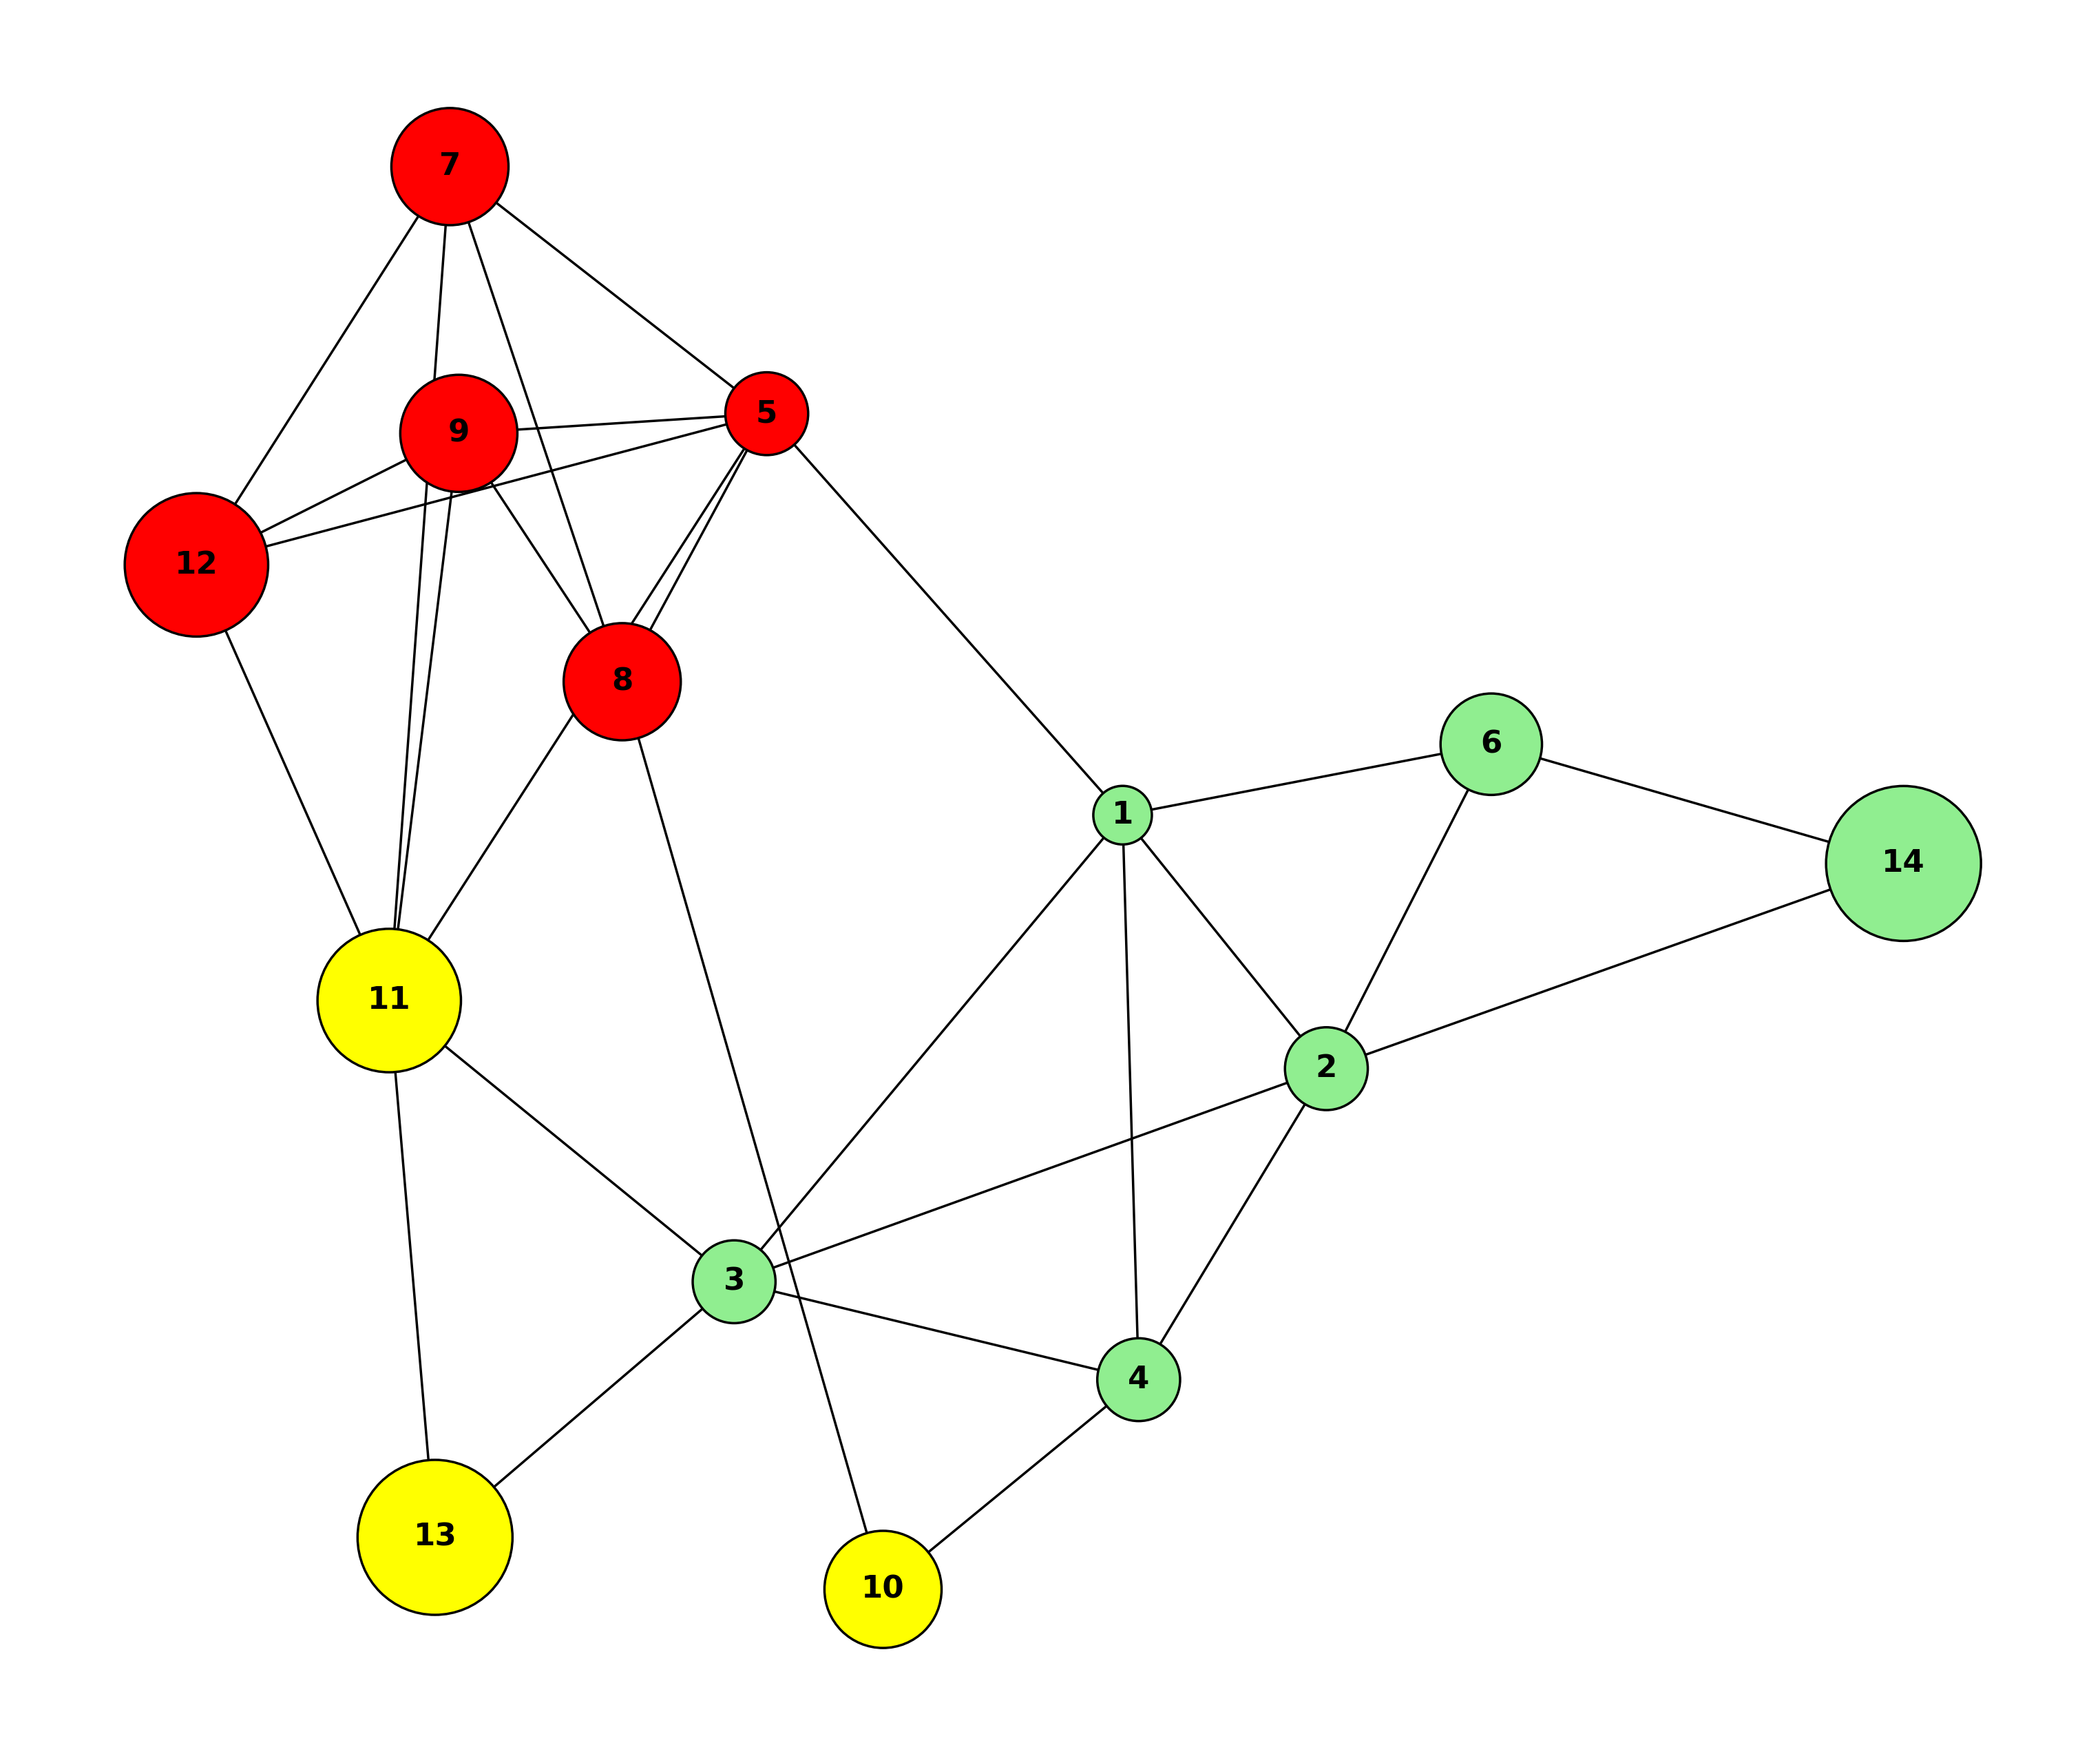

In [13]:
# subax1 = plt.subplot(121)

pos = nx.spring_layout(G_to_draw, seed=8) #22б 28

# options = {
#     'width': 1,
#     'node_color': 'white',
# }


fig = plt.figure(1, figsize=(12, 10), dpi=250)

nx.draw(G_to_draw,
        pos=pos,
        with_labels=True, 
        font_weight='bold',
        width=1,
        # node_color='lightgray',
        node_color=colors,
        font_family="sans-serif",
        font_size=13,
        clip_on=False,
        # node_shape="8",
        node_size=6*np.array(list(dict(G_to_draw.nodes(data="size", default=100)).values())),
)

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

In [14]:
G, s = get_simrank(node_weights_flag=True)

In [15]:
s

defaultdict(list,
            {'trusted': defaultdict(int,
                         {'trusted': 1,
                          'untrusted': 0.002783773137522552,
                          'semi-trusted': 0.0037645411478653148,
                          '1': 0.034051123335570636,
                          '2': 0.023041812150212955,
                          '3': 0.024693208788286,
                          '4': 0.026112102920918666,
                          '5': 0.006302111881005624,
                          '6': 0.024788555036375434,
                          '7': 0.0060955487180942205,
                          '8': 0.006564692349282296,
                          '9': 0.0060955487180942205,
                          '10': 0.01806297579138908,
                          '11': 0.009555190381894826,
                          '12': 0.006959127377023458,
                          '13': 0.013841554830182352,
                          '14': 0.036314053372378335}),
             'untrusted': de

In [16]:
to_draw = dict(s['trusted'].copy())

del to_draw['trusted']
del to_draw['untrusted']
del to_draw['semi-trusted']

to_draw

{'1': 0.034051123335570636,
 '2': 0.023041812150212955,
 '3': 0.024693208788286,
 '4': 0.026112102920918666,
 '5': 0.006302111881005624,
 '6': 0.024788555036375434,
 '7': 0.0060955487180942205,
 '8': 0.006564692349282296,
 '9': 0.0060955487180942205,
 '10': 0.01806297579138908,
 '11': 0.009555190381894826,
 '12': 0.006959127377023458,
 '13': 0.013841554830182352,
 '14': 0.036314053372378335}

In [17]:
values = list(to_draw.values())

In [18]:
values

[0.034051123335570636,
 0.023041812150212955,
 0.024693208788286,
 0.026112102920918666,
 0.006302111881005624,
 0.024788555036375434,
 0.0060955487180942205,
 0.006564692349282296,
 0.0060955487180942205,
 0.01806297579138908,
 0.009555190381894826,
 0.006959127377023458,
 0.013841554830182352,
 0.036314053372378335]

In [19]:
thr_1 = np.quantile(np.array(values), 0.8)
thr_2 = np.quantile(np.array(values), 0.3)

tier_1 = [key for key, value in to_draw.items() if value >= thr_1]
tier_2 = [key for key, value in to_draw.items() if value < thr_1 and value >= thr_2]
tier_3 = [key for key, value in to_draw.items() if value < thr_2]

In [20]:
tier_1

['1', '4', '14']

In [21]:
tier_2

['2', '3', '6', '10', '11', '12', '13']

In [22]:
tier_3

['5', '7', '8', '9']

In [23]:
G_to_draw = G.copy()

In [24]:
for node in ['trusted', 'untrusted', 'semi-trusted']:
    G_to_draw.remove_node(node)

In [25]:
colors = ['lightgreen' if i in tier_1 else 'yellow' if i in tier_2 else 'red' for i in  G_to_draw.nodes]

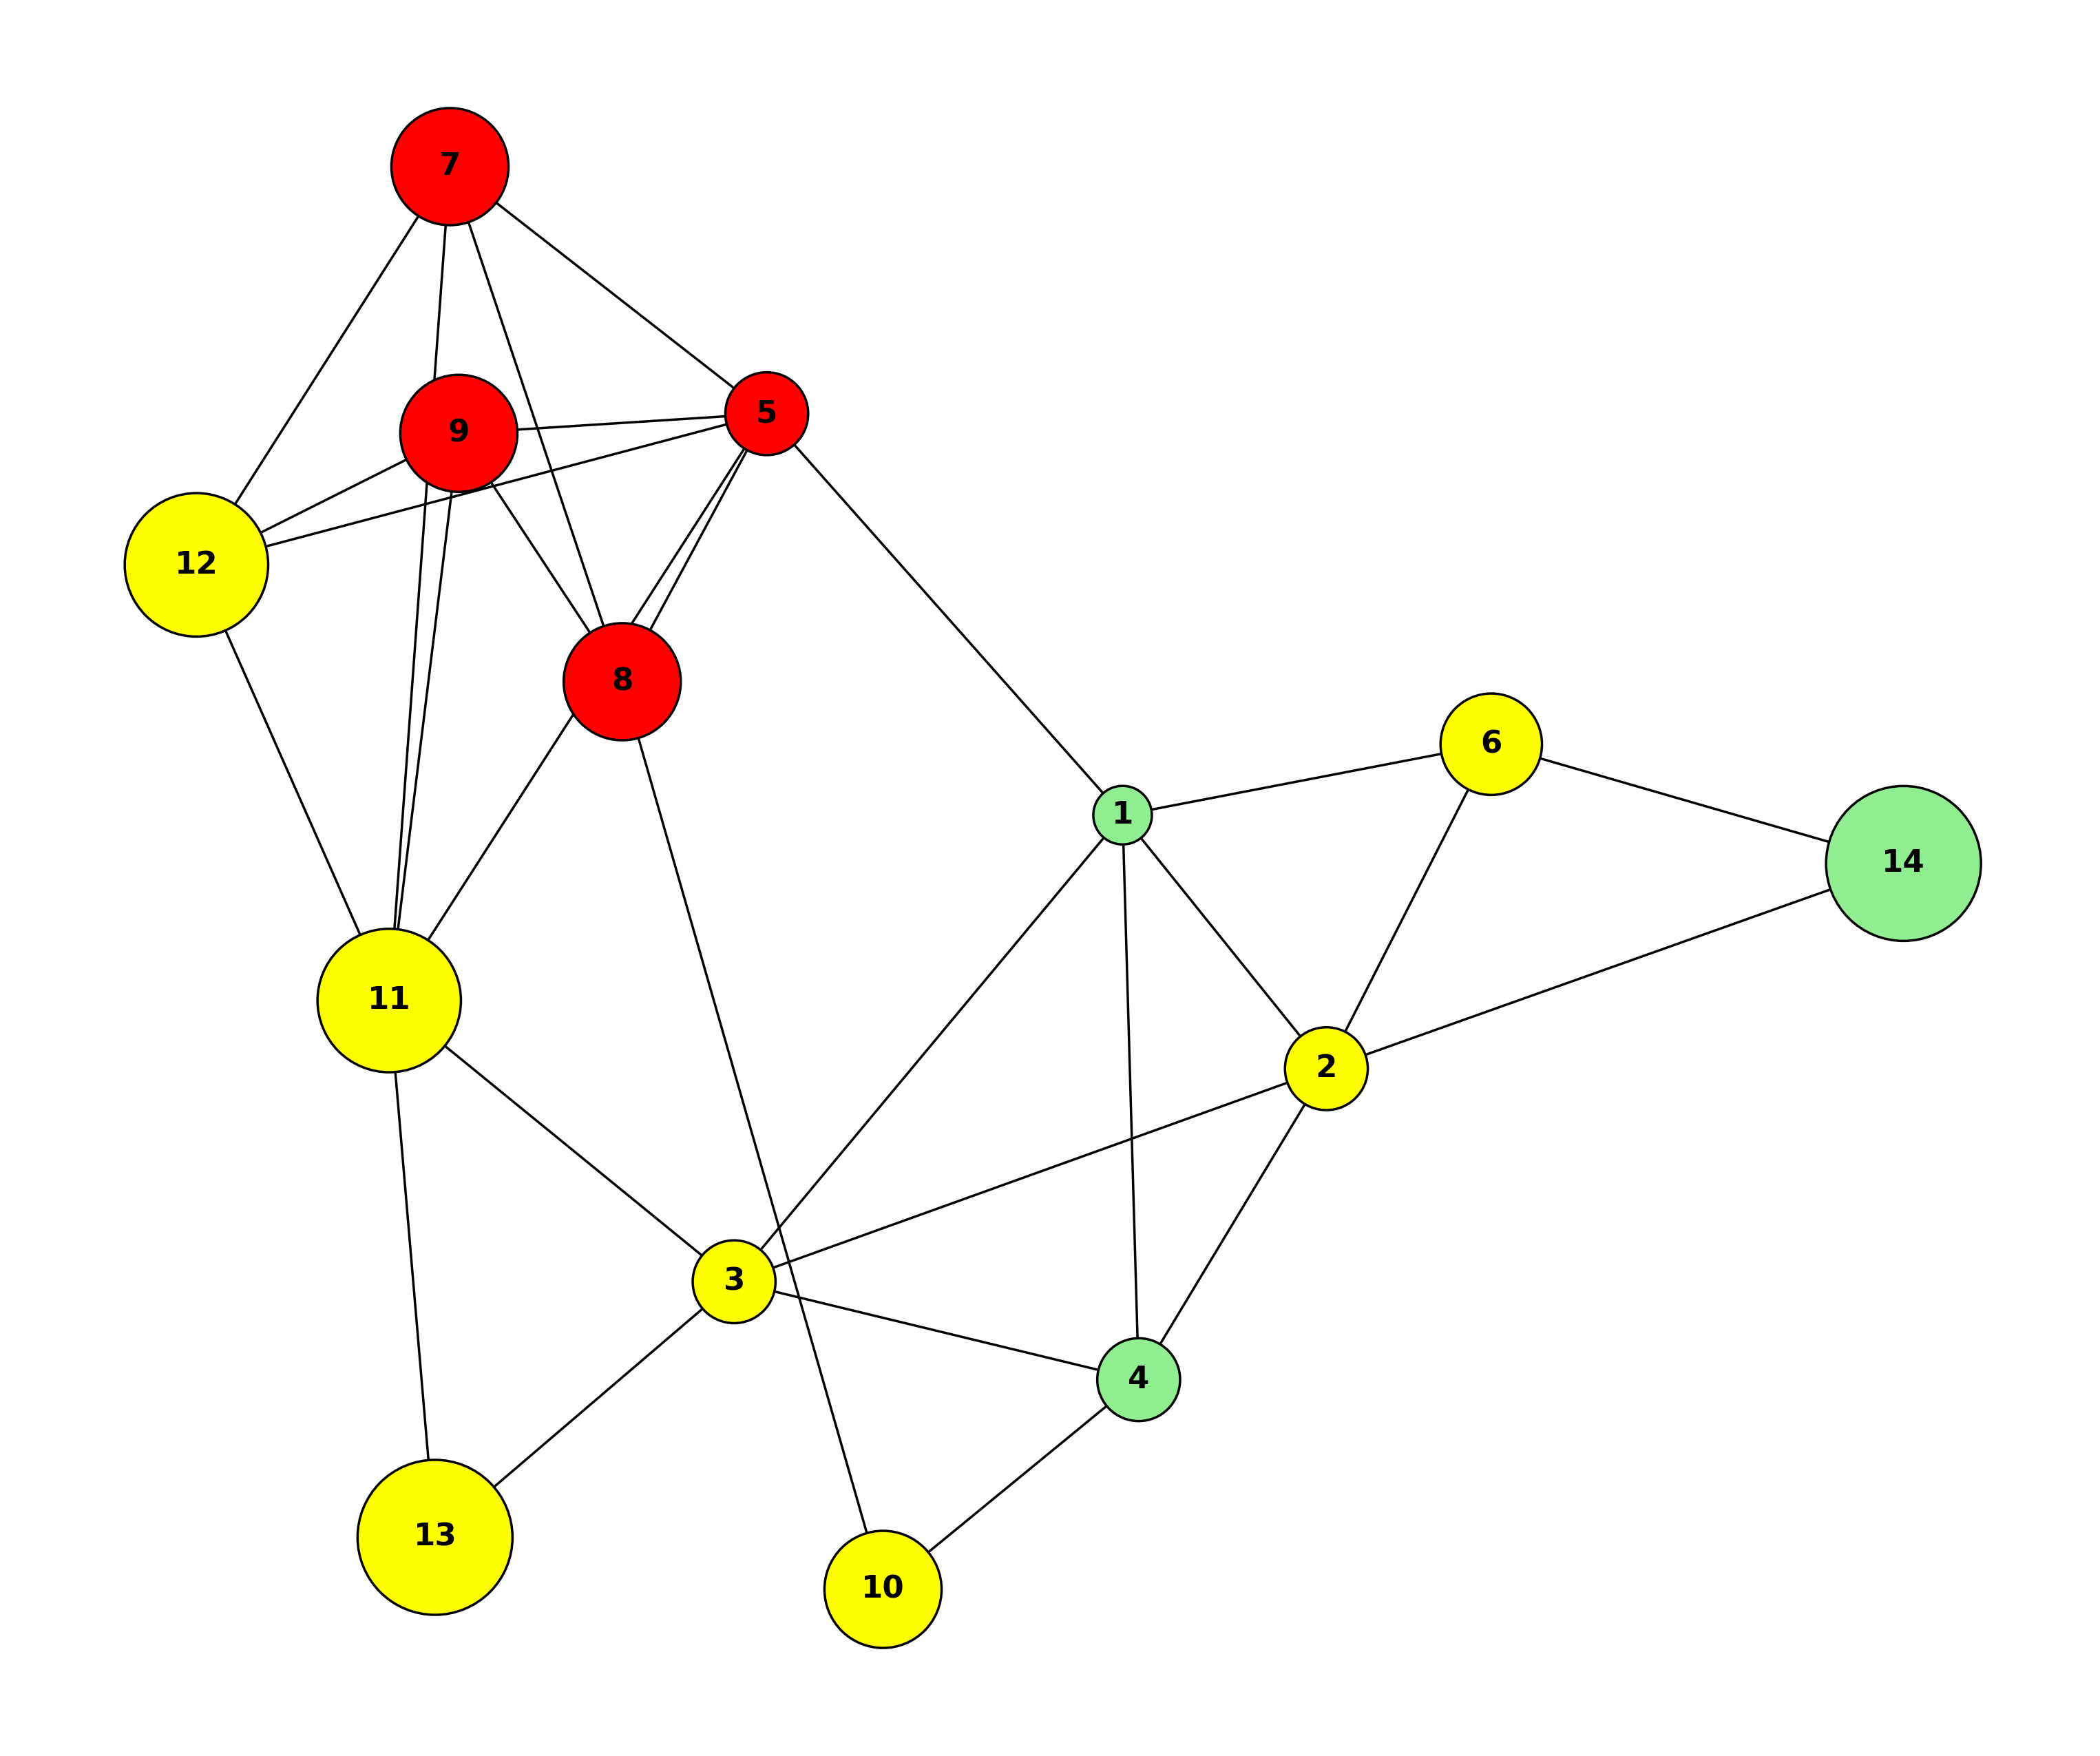

In [26]:
# subax1 = plt.subplot(121)

pos = nx.spring_layout(G_to_draw, seed=8) #22

# options = {
#     'width': 1,
#     'node_color': 'white',
# }


fig = plt.figure(1, figsize=(12, 10), dpi=250)

nx.draw(G_to_draw,
        pos=pos,
        with_labels=True, 
        font_weight='bold',
        width=1,
        # node_color='lightgray',
        node_color=colors,
        font_family="sans-serif",
        font_size=13,
        clip_on=False,
        # node_shape="8",
        node_size=6*np.array(list(dict(G_to_draw.nodes(data="size", default=100)).values())),
)

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

In [5]:
G_untouched = G.copy()

In [6]:
for node in ['trusted', 'untrusted', 'semi-trusted']:
    G_untouched.remove_node(node)

C:\Users\HP\AppData\Local\Temp\ipykernel_11768\1611771727.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


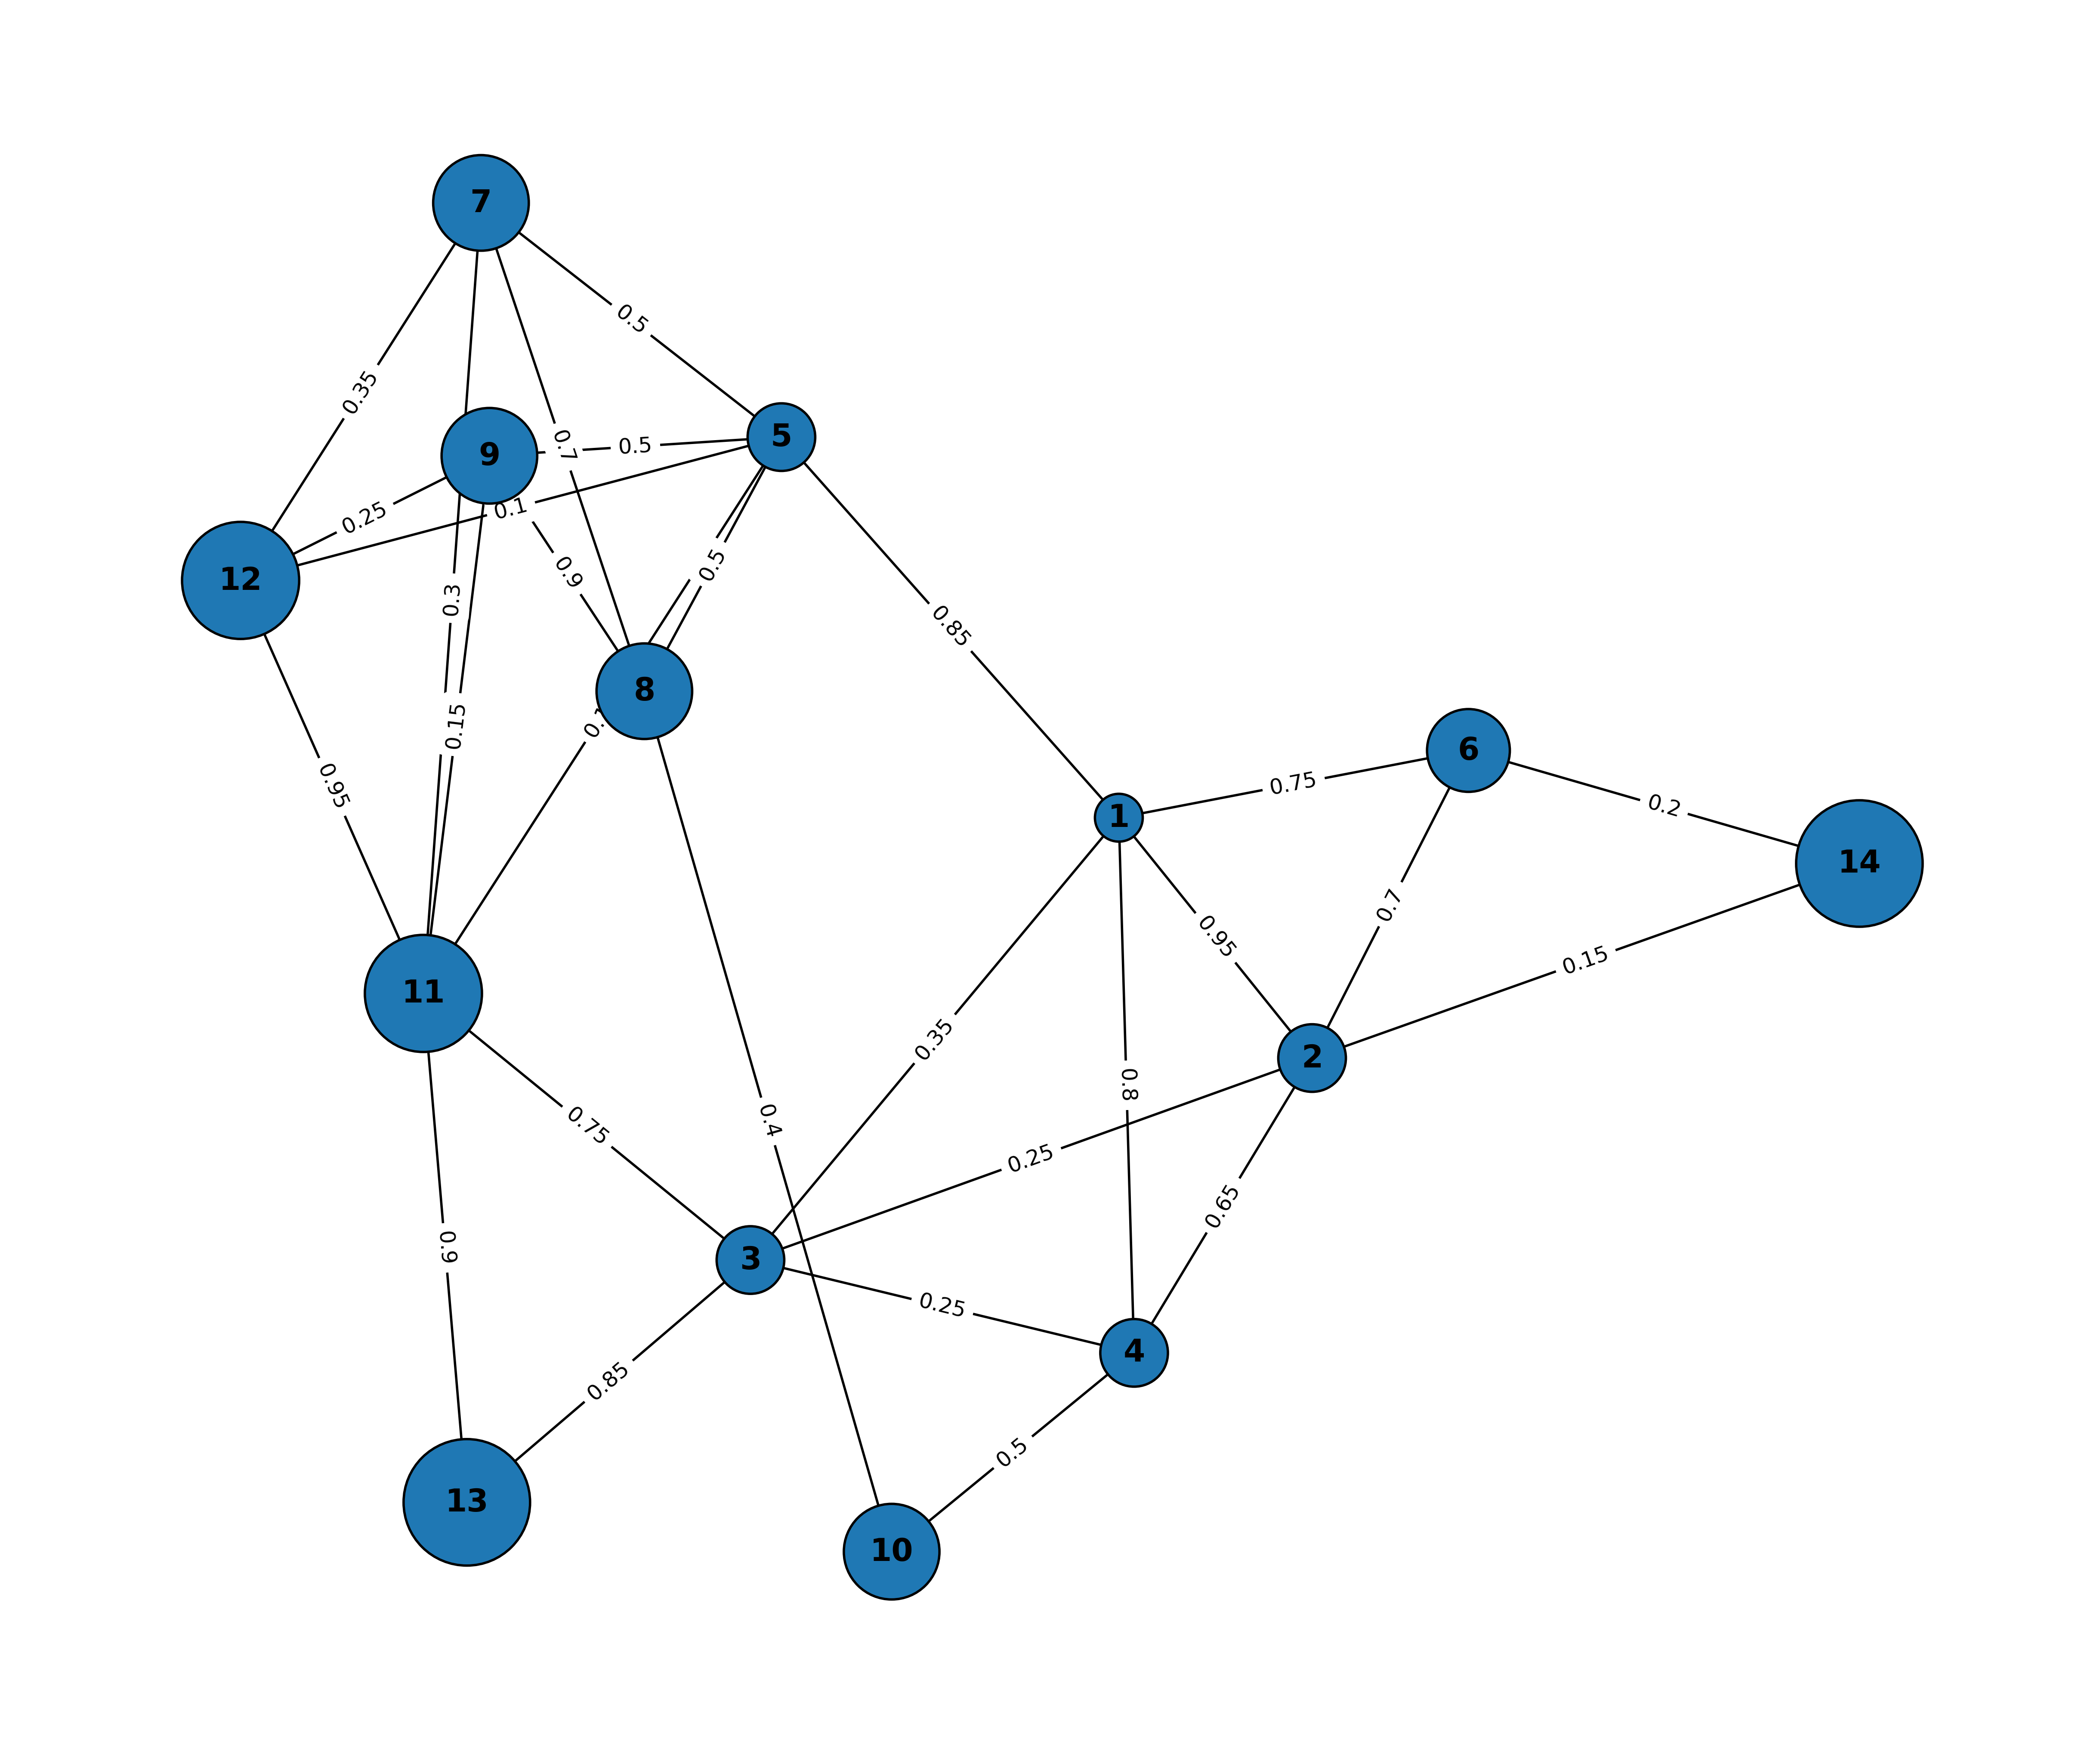

In [19]:
# subax1 = plt.subplot(121)

pos = nx.spring_layout(G_untouched, seed=8) #9

# options = {
#     'width': 1,
#     'node_color': 'white',
# }


fig = plt.figure(1, figsize=(12, 10), dpi=400)

nx.draw(G_untouched,
        pos=pos,
        with_labels=True, 
        font_weight='bold',
        width=1,
        #node_color='lightgray',
        font_family="sans-serif",
        font_size=13,
        clip_on=False,
        # node_shape="8",
        node_size=4*np.array(list(dict(G_untouched.nodes(data="size", default=100)).values())),
)

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")

# edge weight labels
edge_labels = nx.get_edge_attributes(G_untouched, "weight")
nx.draw_networkx_edge_labels(G_untouched, pos, edge_labels, font_size=9, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
G, s = get_simrank(edges_weights_flag=True)

In [13]:
for key, value in s['trusted'].items():
    print(f"{key}: {round(value, 3)},")

trusted: 1,
untrusted: 0.035,
semi-trusted: 0.031,
1: 0.146,
2: 0.129,
3: 0.109,
4: 0.121,
5: 0.058,
6: 0.117,
7: 0.051,
8: 0.054,
9: 0.051,
10: 0.072,
11: 0.065,
12: 0.055,
13: 0.071,
14: 0.124,


In [9]:
s

defaultdict(list,
            {'trusted': defaultdict(int,
                         {'trusted': 1,
                          'untrusted': 0.03525789793181316,
                          'semi-trusted': 0.0309536669285941,
                          '1': 0.14564703621536795,
                          '2': 0.12911586520851265,
                          '3': 0.10940826655740782,
                          '4': 0.12059633729758071,
                          '5': 0.05758690222939652,
                          '6': 0.11663006095017577,
                          '7': 0.05106642515570514,
                          '8': 0.05399952749510997,
                          '9': 0.05106642515570514,
                          '10': 0.07187405014448572,
                          '11': 0.06460777443632668,
                          '12': 0.05459642596730376,
                          '13': 0.07073642887530811,
                          '14': 0.12402821062404468}),
             'untrusted': defaultdict(int,
 

In [ ]:
edges_weights = {(u, v): w for u, v, w in G.edges(data='weight')} | {(v, u): w for u, v, w in G.edges(data='weight')}

In [ ]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if u not in ['trusted', 'untrusted', 'semi-trusted']]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if u in ['trusted', 'untrusted', 'semi-trusted']]

pos = nx.spring_layout(G, seed=)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, 
                       pos,
                       # font_weight='bold',
                       # width=1,
                       # node_color='lightgray',
                       # font_family="sans-serif",
                       # font_size=13,
                       # clip_on=False,
                       node_size=1.5*np.array(list(dict(G.nodes(data="size", default=100)).values())))

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.65, style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
G, s = get_simrank(weights_flag=True)

In [ ]:
s

In [ ]:
for i, j in G.nodes(data=True):
    print(f"{i}: {j['weight']},")